In [1]:
from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

In [2]:
# data load
zoo = pd.read_csv("sklearn_practice/data-04-zoo.csv")
iris = datasets.load_iris()

------------------------------------------------------------
confusion matrix of zoo test data
[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]

------------------------------------------------------------
confusion matrix of iris test data
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

------------------------------------------------------------
confusion matrix of whole zoo data
[[41  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0  4  0  1  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 10]]



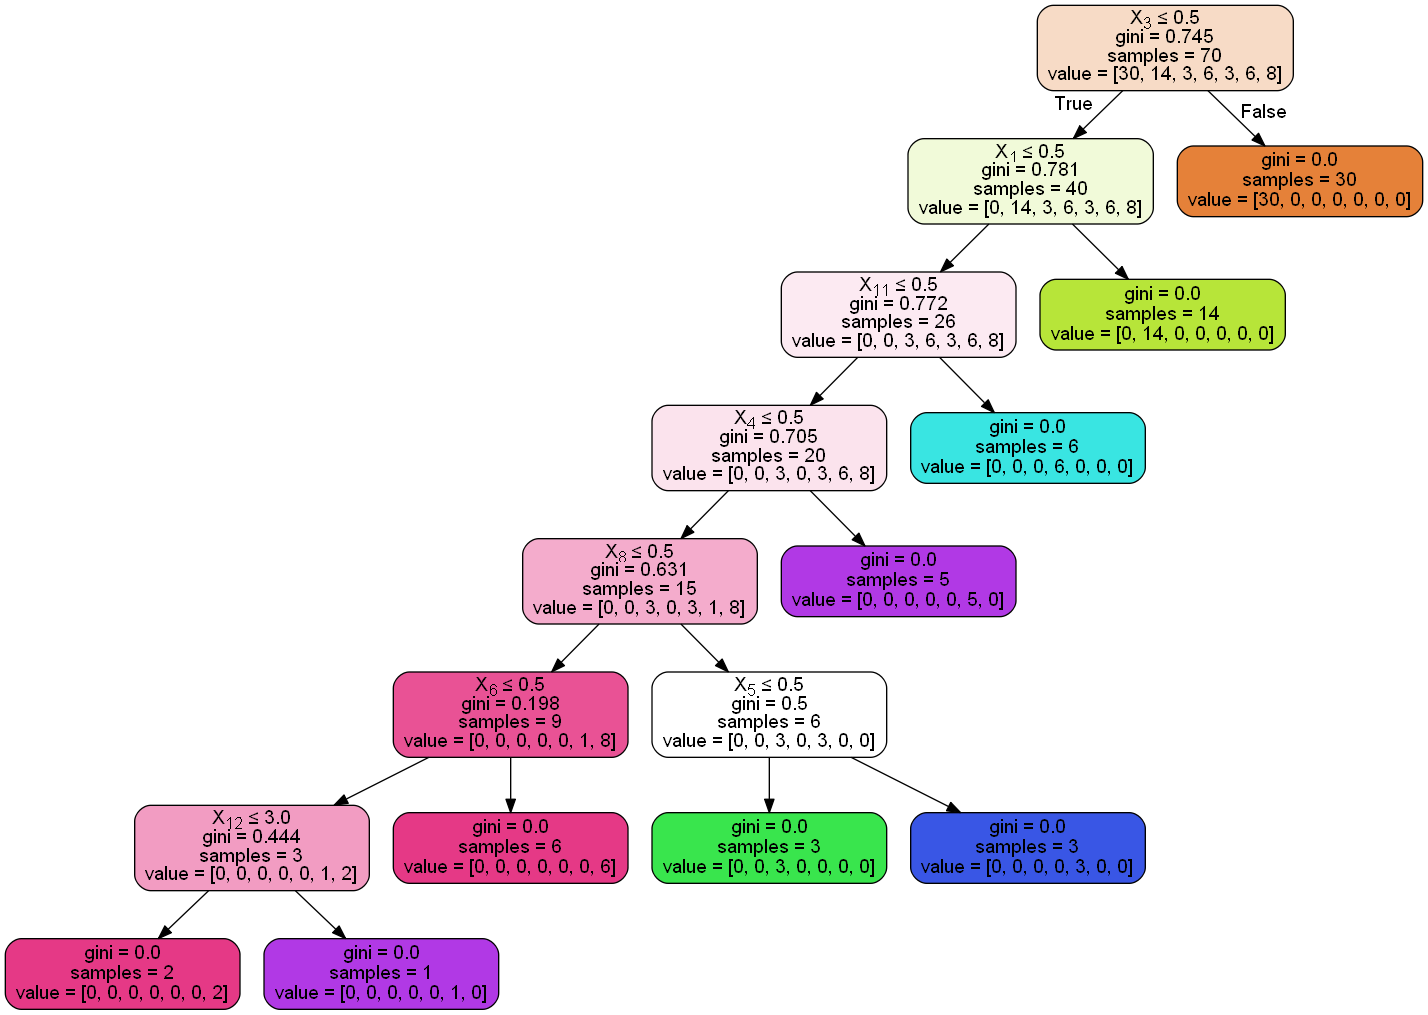

In [52]:
#read csv file and fill X and Y
X = list()
y = list()
for item in zoo.values:
    X.append(item[:16])
    y.append(item[16])

X_iris = iris.data
y_iris = iris.target


# split each datasets into two parts = train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.30)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, random_state = 0)

"""
X_train = X[:65]
X_test = X[65:]

y_train = y[:65]
y_test = y[65:]
"""

# train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)
dtree_model_iris = DecisionTreeClassifier(max_depth = 3).fit(X_train_iris, y_train_iris)

# get predictions
dtree_predictions = dtree_model.predict(X_test)
dtree_predictions_whole = dtree_model.predict(X)
dtree_predictions_iris = dtree_model_iris.predict(X_test_iris)

# get confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
cm_whole = confusion_matrix(y, dtree_predictions_whole)
cm_iris = confusion_matrix(y_test_iris, dtree_predictions_iris)

print('-'*60)
print("confusion matrix of zoo test data")
print(cm)
print()
print('-'*60)
print("confusion matrix of iris test data")
print(cm_iris)
print()
print('-'*60)
print("confusion matrix of whole zoo data")
print(cm_whole)
print()


dot_data = StringIO()

export_graphviz(dtree_model, out_file = dot_data, filled = True, rounded = True,
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

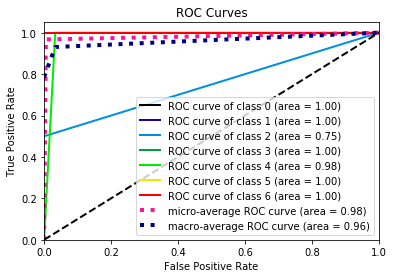

In [53]:
import matplotlib.pyplot as plt
import scikitplot as skplt

predicted_proba_zoo = dtree_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_proba_zoo)
plt.show()